In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import f1_score
import nltk
from itertools import chain

In [2]:
DFRAME_PATH="/home/dm12h/authorship/temp/aggregated_df.csv"

In [3]:
df = pd.read_csv(DFRAME_PATH)

In [4]:
df

,author,book,text,text_no_punkt,lemmas,tags,tokens
0,Аверченко,Averchenko_A-T-Averchenko-Sobranie-sochineniy-...,Мы за пять лет. Материалы [к биографии]\nКак б...,Мы за пять лет Материалы к биографии Как будто...,пять год материал биография кроваво-красный ра...,4_NUMR 3_NOUN 9_NOUN 9_NOUN 15_ADJF 6_NOUN 8_V...,Мы за пять лет . Материалы [ к биографии ] Как...
1,Аверченко,Averchenko_A-T-Averchenko-Sobranie-sochineniy-...,Сидел он за большим письменным столом перед де...,Сидел он за большим письменным столом перед де...,сидеть больший письменный стол деревянный доск...,5_VERB 7_ADJF 10_ADJF 6_NOUN 10_ADJF 6_NOUN 6_...,Сидел он за большим письменным столом перед де...
2,Аверченко,Averchenko_A-T-Averchenko-Sobranie-sochineniy-...,"— Да уж, — качал головой сдержанный Ре-ми. — Н...",Да уж качал головой сдержанный Ре-ми Нехорошо ...,качать голова сдержать ре-ми нехорошо нехорошо...,5_VERB 7_NOUN 10_PRTF 5_None 8_ADVB 8_ADVB 4_A...,"— Да уж , — качал головой сдержанный Ре-ми . —..."
3,Аверченко,Averchenko_A-T-Averchenko-Sobranie-sochineniy-...,"Поверит ли кто-нибудь, что нами за эти пять ле...",Поверит ли кто-нибудь что нами за эти пять лет...,поверить кто-нибудь пять год совместно м.г кор...,7_VERB 10_NPRO 4_NUMR 3_NOUN 9_ADVB 3_None 11_...,"Поверит ли кто-нибудь , что нами за эти пять л..."
4,Аверченко,Averchenko_A-T-Averchenko-Sobranie-sochineniy-...,"8\nАверченко А. Избранные рассказы. М., 1985. ...",8 Аверченко А Избранные рассказы М 1985 С 7 9 ...,8 избранный рассказ м 1985 7 9 ежегодник 156 1...,1_None 9_ADJF 8_NOUN 1_NOUN 4_None 1_None 1_No...,"8 Аверченко А. Избранные рассказы . М. , 1985 ..."
...,...,...,...,...,...,...,...
17731,Чехов,zhivoi-tovar.epub,"— Это ужасно, Григорий Васильич! — заговорил Б...",Это ужасно Григорий Васильич заговорил Бугров ...,это ужасно григорий васильич заговорить бугров...,3_PRCL 6_ADVB 8_NOUN 8_NOUN 9_VERB 6_NOUN 6_GR...,"— Это ужасно , Григорий Васильич ! — заговорил..."
17732,Чехов,zhivoi-tovar.epub,Грохольский жил всё в той же даче… Надежды и ж...,Грохольский жил всё в той же даче Надежды и же...,грохольский жить всё дача надежда желание мале...,11_ADJF 3_VERB 3_PRCL 4_NOUN 7_NOUN 7_NOUN 9_A...,Грохольский жил всё в той же даче… Надежды и ж...
17733,Чехов,zhivoi-tovar.epub,Бугров держал Лизу за талию и говорил ей:\n— М...,Бугров держал Лизу за талию и говорил ей Милая...,бугров держать лиза талия говорить милый делат...,6_NOUN 6_VERB 4_NOUN 5_NOUN 7_VERB 5_ADJF 6_IN...,Бугров держал Лизу за талию и говорил ей : — М...
17734,Чехов,zhivoi-tovar.epub,"— Тебе скучно, Лизочка? — заговорил он после н...",Тебе скучно Лизочка заговорил он после непродо...,скучно лизочко заговорить непродолжительный мо...,6_ADVB 7_NOUN 9_VERB 18_ADJF 8_NOUN 8_VERB 6_A...,"— Тебе скучно , Лизочка ? — заговорил он после..."


In [5]:
def split_sentences(text):
    return nltk.sent_tokenize(text)

def make_words(sentences):
    words = list(chain(*(nltk.word_tokenize(sentence) for sentence in sentences)))
    return words

def word_len_avg(words):
    total_len = sum(len(word) for word in words)
    return total_len / len(words)

def word_per_sentence(sentences, words):
    num_sentences = len(sentences)
    num_words = len(words)
    return np.log(num_words / num_sentences)

def exclamation_density(sentences):
    exclamations_cnt = len([s for s in sentences if '!' in s])
    return exclamations_cnt / len(sentences)

def question_density(sentences):
    questions_cnt = len([s for s in sentences if '?' in s])
    return questions_cnt / len(sentences)

def comma_density(sentences):
    questions_cnt = sum([s.count(",") for s in sentences])
    return questions_cnt / len(sentences)

def dialogue_density(sentences):
    long_dash = chr(8212)
    counts = len([sentence for sentence in sentences if sentence.startswith(long_dash)])
    return counts / len(sentences)

In [6]:
def count_features(df):
    tokenized_text = df.text.map(split_sentences)
    words = tokenized_text.map(make_words)
    temp_df = pd.DataFrame({"words": words, "sentences":tokenized_text})
    feature_map = {
        "word_avg_length": words.map(word_len_avg),
        "words_per_sentence": temp_df.apply(lambda x: word_per_sentence(x["sentences"], x["words"]),axis=1),
        "exclamation_density": tokenized_text.map(exclamation_density),
        "question_density": tokenized_text.map(question_density),
        "comma_density":  tokenized_text.map(question_density),
        "dialogue_density": tokenized_text.map(dialogue_density),
    }
    feature_df = pd.DataFrame(feature_map)
    
    return pd.merge(df, feature_df, left_index=True, right_index=True)

In [7]:
df = count_features(df)

In [8]:
df['counts'] = df.book.map(df.book.value_counts())
def add_class_based_weigths(df):
    author_counts= df.author.map(df.author.value_counts())
    num_authors = len(df.author.unique())
    df["probs"] = 1/(author_counts*num_authors)
add_class_based_weigths(df)

In [9]:
def select_sample(dataframe, size=0.1):
    df_size = len(dataframe)
    idx = np.random.choice(df_size,size=int(df_size * size), p=dataframe.probs)
    return dataframe.iloc[idx]

In [10]:
def train_test_split(df, share=0.5, seed=10):
    rg = np.random.default_rng(seed)
    labels = df.author.unique()
    shuffled_labels = labels[rg.permutation(len(labels))]
    
    train_label = []
    test_label = []
    train_counts = 0
    test_counts = 0

    for label in shuffled_labels:
        df_slice = df[df.author==label][["book", "counts"]]
        unique_books = df_slice.drop_duplicates("book")
        if len(unique_books) < 2:
            raise ValueError(f"too few books of author: {label}")
        permunation = rg.permutation(len(unique_books))
        shuffled_books = unique_books.iloc[permunation]
        train_labels = []
        test_labels = []
        label_train_count = 0
        label_total_count = np.sum(shuffled_books["counts"])
        i = 0
        for _, row in shuffled_books.iloc[:-1].iterrows():
            num_segments = row.counts
            if not label_train_count:
                i+=1
                label_train_count += num_segments
                continue
            new_train_count = label_train_count + num_segments
            new_share = new_train_count / label_total_count
            old_share = label_train_count / label_total_count
            if abs(share - new_share) > abs(share - old_share):
                break
            i+=1
            label_train_count += num_segments
        train_label.extend(shuffled_books.iloc[:i].book)
        test_label.extend(shuffled_books.iloc[i:].book)
        train_counts += label_train_count
        test_counts += label_total_count - label_train_count
    train_df = df[df["book"].isin(set(train_label))]
    test_df = df[df["book"].isin(set(test_label))]
    assert len(train_df) + len(test_df) == len(df), \
        "split is wrong"
    y_train = train_df["author"]
    y_test = test_df["author"]
    return train_df, test_df, y_train, y_test

In [11]:
def get_document_vectorizer(frame, n_min=1, n=2, max_count=10000, column="lemmas", stops=None):
    texts_vector = frame[column]
    vectorizer = TfidfVectorizer(ngram_range=(n_min,n), max_features=max_count, norm='l2', stop_words=stops)
    return vectorizer

def get_author_vectorizer(frame, n_min=1, n=2, max_count=10000, column="lemmas", stops=None):
    grouped_text = frame.groupby("author", as_index = False)[column].agg({column: ' '.join})
    vectorizer = TfidfVectorizer(ngram_range=(n_min,n), max_features=max_count, norm='l2', stop_words=stops)
    texts_vector = frame[column]
    vectorizer.fit(grouped_text[column])
    return vectorizer

In [12]:
def get_encoder(frame, column="author"):
    encoder = LabelEncoder()
    encoder.fit(frame[column])
    return encoder

In [13]:
def gradient_descent(function, x_start, learning_rate, epsilon, delta, num_iterations):
    x_curr = x_start
    df_x = sp.diff(function) # производная

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
        derivative = df_x.subs(_x, x_curr)
        if abs(derivative) < delta:
            print(f"derivative smaller that threshold {delta}",file=sys.stderr)
            break
        x_new = x_curr - learning_rate * derivative
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            print("update speed is less than threshold {epsilon}", file=sys.stderr)
            break

        x_curr = x_new

    return x_curr, trace

In [14]:
def check_seq(val):
    iterable = hasattr(val, "__iter__")
    not_string = not isinstance(val , str)
    return iterable and not_string

class Featurebuilder:
    feature_mapping = {"tokens": "vectorizer", 
                       "text_no_punkt": "vectorizer",
                       "lemmas": "vectorizer",
                       "tags": "vectorizer"}
    
    def __init__(self, *args, **vectorizers):
        vectorizers = {k.lstrip("vec_"):v for k,v in vectorizers.items()}
        featurelist = self.pack_features(args)
        self.vectorizers = {}
        for feature in featurelist:
            processor = self.feature_mapping.get(feature, None)
            if not processor:
                self.vectorizers[feature] = None
                continue
            if processor != "vectorizer":
                raise ValueError("only vectorizing is supported for non-scalar features")
            vectorizer = vectorizers.get(feature, None)
            if vectorizer is None:
                raise ValueError(f"no vectorizer for feature: {feature}")
            self.vectorizers[feature] = vectorizer
        self.ordered_ft = list(sorted(featurelist,
                                      key=lambda x: self.feature_mapping.get(x, "")))
        self.ordered_proc = [self.feature_mapping.get(ft, None) for ft in self.ordered_ft]
        self._initialized = False
        self.feature_idx = None
        
    @staticmethod
    def pack_features(features):
        attrs = (ft if check_seq(ft)  else (ft, ) for ft in features)
        return list(chain(*attrs))
    
    @staticmethod
    def get_last_occurence(seq, val):
        return len(seq) - 1 - seq[::-1].index(val)
    
    @staticmethod
    def get_first_occurence(seq, val):
        return seq.index(val)
    
    def fit_transform(self, df):
        feature_positions = []
        feature_matrices = []
        for proc in set(self.ordered_proc):
            first_idx  = self.get_first_occurence(self.ordered_proc, proc)
            last_idx = self.get_last_occurence(self.ordered_proc, proc)
            feature_slice = self.ordered_ft[first_idx:last_idx+1]
            
            smat, fpos = self.bulk_process(df, proc, feature_slice)
            
            feature_matrices.append(smat)
            feature_positions.extend(fpos)
            
        final_matrix = sp.sparse.hstack(feature_matrices)
        counter = 0
        self.feature_idx = dict()
        for ft, length in zip(self.ordered_ft, feature_positions):
            self.feature_idx[ft] = (counter, length)
            counter+=length
        self._initialized = True
        return final_matrix
    
    def transform(self, df):
        feature_matrices = []
        for proc in set(self.ordered_proc):
            first_idx  = self.get_first_occurence(self.ordered_proc, proc)
            last_idx = self.get_last_occurence(self.ordered_proc, proc)
            feature_slice = self.ordered_ft[first_idx:last_idx+1]
            smat, fpos = self.bulk_process(df, proc, feature_slice)
            feature_matrices.append(smat)
        final_matrix = sp.sparse.hstack(feature_matrices)
        return final_matrix
    
    def bulk_process(self, df, proc, featurelist):
        if proc is None:
            columns = df[featurelist].to_numpy(dtype=np.float64)
            mat = sp.sparse.csr_matrix(columns)
            indices = [1 for ft in featurelist]
            return mat, indices
        elif proc != "vectorizer":
            raise ValueError("only vectorizers supported now")
        else:
            matrices = []
            indices = []
            for i, feature in enumerate(featurelist):
                vectorizer = self.vectorizers[feature]
                mat = vectorizer.transform(df[feature])
                matrices.append(mat)
                indices.append(mat.shape[1])
            return sp.sparse.hstack(matrices), indices
    
    
    def find_idx(self, idx):
        for key, (start, length) in self.feature_idx.items():
            if  start <= idx < (start + length):
                break
        else:
                raise ValueError(f"index {idx} too big")
        vectorizer = self.vectorizers[key]
        if vectorizer is None:
            return key
        else:
            features = vectorizer.get_feature_names_out()
            return features[idx-start]

In [15]:
def get_top_features(label_enc, data_enc, clf, n):
    names = label_enc.classes_
    coeffs = clf.coef_
    author_dict = dict()
    for i, author in enumerate(names):
        args_sorted = list(reversed(np.argsort(coeffs[i])[-n:]))
        features = [data_enc.find_idx(idx) for idx in args_sorted]
        author_dict[author] = features
    df = pd.DataFrame(author_dict)
    return df

In [16]:
def train_crossval_twofold(frame, clf, *args, split=0.5, vectorizer_dict=None, avg="micro"):
    split = train_test_split(df, share=0.5)
    x_split = split[:2]
    y_split = split[2:]
    scores = []
    for train_idx, test_idx in ((1, 0), (0, 1)):
        df_train = x_split[train_idx]
        df_test = x_split[test_idx]
        
        y_train = y_split[train_idx]
        y_test = y_split[test_idx]
        
        if vectorizer_dict == None:
            raise ValueError("not using any vectorizer!")
        vecs = dict()
        for fname, params in vectorizer_dict.items():
            vecs["vec_"+fname] = get_author_vectorizer(df_train, **params, column=fname)
            
        data_encoder = Featurebuilder(*args, **vecs)
        x_train = data_encoder.fit_transform(df_train)
        x_test = data_encoder.fit_transform(df_test)
        
        label_encoder = get_encoder(frame=df)
        y_train = label_encoder.transform(y_train)
        y_test = label_encoder.transform(y_test)
        
        clf.fit(x_train, y_train)
        score = f1_score(clf.predict(x_test), y_test, average=avg)
        scores.append(score)
    return scores

### Попробуем простую регрессию на лемматизированном тексте:
возьмем лемматизированные отрезки текста, векторизируем их и попробуем предсказать

In [213]:
clf = LogisticRegression(class_weight="balanced",
                         warm_start=False,
                         max_iter=500)
param_dict = {
    "lemmas": {
        "max_count": 10000,
    }
}
scores = train_crossval_twofold(df, clf, "lemmas", vectorizer_dict=param_dict)
print(np.mean(scores))

0.6997042915120277


### Попробуем прогнать регрессию на комбинациях частей речи

In [219]:
clf = LogisticRegression(class_weight="balanced",
                         warm_start=False,
                         max_iter=500)
param_dict = {
    "tags": {
        "max_count": 10000,
        "n_min":1,
        "n":3
    }
}
scores = train_crossval_twofold(df, clf, "tags", vectorizer_dict=param_dict)
print(np.mean(scores))

0.48267047031434407


Результат слабый. Мы убираем большую часть информации из текста, оставляя только зависимости, но гибкости модели (или информации) недостаточно для эффективного разделения

### Посмотрим на то,помогут ли токены вместе с пунктуацией

In [17]:
clf = LogisticRegression(class_weight="balanced",
                         warm_start=False,
                         max_iter=500)
param_dict = {
    "tokens": {
        "max_count": 10000,
        "n_min":1,
        "n":3
    }
}
scores = train_crossval_twofold(df, clf, "tokens", vectorizer_dict=param_dict)
print(np.mean(scores))

0.6634488587805086


Результат хуже, чем просто на леммах. попробуем комбинировать признаки- добавим к леммам токенизированный текст.

In [21]:
clf = LogisticRegression(class_weight="balanced",
                         warm_start=False,
                         max_iter=500)
param_dict = {
    "tokens": {
        "max_count": 10000,
        "n_min":1,
        "n":3,},
    "lemmas": {
        "max_count": 10000,
    }
}

scores = train_crossval_twofold(df, clf, "tokens", "lemmas", vectorizer_dict=param_dict)
print(np.mean(scores))

0.7277471517678047


### Лучший вариант

In [17]:
scalar_features = ["word_avg_length", "words_per_sentence",
                   "exclamation_density", "question_density",
                   "comma_density", "dialogue_density"]

In [19]:
clf = LogisticRegression(class_weight="balanced",
                         warm_start=False,
                         max_iter=500)
param_dict = {
    "tokens": {
        "max_count": 10000,
        "n_min":1,
        "n":3,},
    "lemmas": {
        "max_count": 10000,
    }
}

scores = train_crossval_twofold(df, clf, "tokens", "lemmas", scalar_features, vectorizer_dict=param_dict)
print(np.mean(scores))

/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

0.7256981815865517


Чтобы визуализировать модель, мы не пользуемся кросс-валидацией, а берем обычное разбиение.
Добавим к частям речи и тегам рассчитанные ранее скалярные параметры. они несущественно увеличивают число признаков, но могут быть полезными, так как вектор слов может не покрывать отдельные отрезки


Также при подборе параметров обнаружилось, что дефолтная регуляризация слишком жесткая, и при меньших значениях модель сходится лучше

Стопслова позволяют, хоть и не полностью, убрать из текста упоминания писателей, попадающиеся из-за грязных данных

In [20]:
names_to_remove = df["author"].unique()
stopwords = [name.lower() for name in names_to_remove]

In [21]:
stopwords

['аверченко',
 'булгаков',
 'бунин',
 'гоголь',
 'горький',
 'достоевский',
 'карамзин',
 'куприн',
 'лермонтов',
 'мордовцев',
 'пушкин',
 'салтыков-щедрин',
 'толстой',
 'тургенев',
 'чехов']

In [22]:
label_encoder = get_encoder(df)
df_train, df_test, y_train, y_test = train_test_split(df, share=0.5)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [25]:
lemmas_vectorizer = get_author_vectorizer(df_train, max_count=10000, column="lemmas", stops=stopwords, n_min=1, n=3)
tag_vectorizer = get_author_vectorizer(df_train, max_count=10000, column="tokens", stops=stopwords, n_min=1, n=3)

data_encoder = Featurebuilder("tokens",
                              "lemmas",
                              scalar_features,
                              vec_tokens=token_vectorizer,
                              vec_lemmas=lemmas_vectorizer)
x_train = data_encoder.fit_transform(df_train)
x_test = data_encoder.transform(df_test)

In [26]:
clf = LogisticRegression(penalty="l2",
                         random_state=10,
                         C=5000,
                         class_weight="balanced",
                         max_iter=1000)
clf.fit(x_train, y_train)

/home/dm12h/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=5000, class_weight='balanced', max_iter=1000,
                   random_state=10)

In [27]:
f1_score(clf.predict(x_test), y_test, average="micro")

0.7849193447542828

Посмотрим на наиболее весомые фичи для каждого класса

In [28]:
get_top_features(label_encoder, data_encoder, clf, n=15)

,Аверченко,Булгаков,Бунин,Гоголь,Горький,Достоевский,Карамзин,Куприн,Лермонтов,Мордовцев,Пушкин,Салтыков-Щедрин,Толстой,Тургенев,Чехов
0,рассказ,ответить,возле,чичиков,самгин,всё,наталья,точно,грушницкий,дуров,пугачёв,словно,левин,рудин,урбенин
1,dialogue_density,сталин,турбина,чичиков,клим,арестант,свой,ромашов,печорин,сперанский,отвечать,однако,дутлов,лаврецкий,всё
2,троцкий,москва,возле,какой,самгин,смотреть,наталья,точно,грушницкий,dialogue_density,дубровский,градоначальник,вронский,герасим,ольга
3,когда,михаил,ответить,голова,человек,ордыновый,лиза,мистер,отвечать,наполеон,гринёв,щедрина,альберт,лаврецкий,грохольский
4,номер,маргарита,каменский,шиллер,артамонов,острог,боярин,башкирцев,казак,девушка,савельич,словно,каренин,дарья михаилович,граф
5,призрак,советский,вечер,голова,клим,наконец,эраст,царь,княжна,словно,индиец,exclamation_density,пьер,рудин,камышева
6,крысак,персиковый,весь,вовсе,артамон,раскольников,лиза,сергей,слепой,словно,крепость,однако,кить,пигас,калинин
7,вы,гражданин,капереть,пирог,рабочий,то,exclamation_density,бузыга,мы,мерзляк,оренбург,аннинька,левин,лежнев,глядеть
8,сандерс,прокуратор,сад,приятный,культура,версиловый,сердце,студент,гора,бурцев,ибрагим,иудушка,пьер,павлович,грохольский
9,журнал,мастер,поле,всякий,артамонов,герой,который,также,сказать,москва,увидеть,салтыков,делес,герасим,дмитрий


При обработке датасета осталась нерешенная проблема с маленьким количеством данных для некоторых классов. Необходимо перепроверить обработку и добавить равномерный самплинг для минимизации потерь качества. тем не менее, метрика качества, более взвешенная по классам, выдает результат ощутимо ниже

In [29]:
f1_score(clf.predict(x_test), y_test, average="macro")

0.6386547996495942

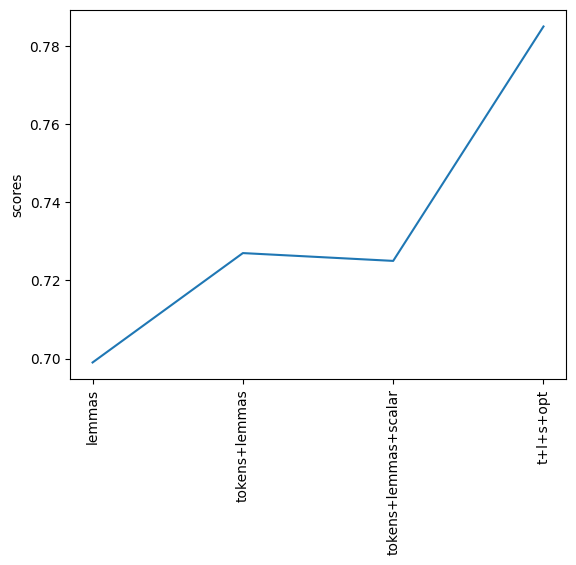

In [32]:
scores_graph = [0.699, 0.727, 0.725, 0.785]
x_ = list(range(4))
import matplotlib.pyplot as plt
plt.plot(x_, scores_graph)
plt.ylabel("scores")
xtick_labels = ["lemmas", "tokens+lemmas", "tokens+lemmas+scalar", "t+l+s+opt"]
plt.xticks(x_, xtick_labels, rotation='vertical')
plt.show()